In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv_data')#데이터프레임

In [6]:
df.head()#높이, 너비 변수 추가

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
perch_full = df.to_numpy()#넘파일 배열

In [4]:
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [7]:
import numpy as np

In [8]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [10]:
# perch_full, perch_weight 훈련, 테스트 세트 나누기
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = train_test_split(
perch_full, perch_weight, random_state=42)

### PolynomialFeatures(사이킷런 변환기) : 특성, 전처리하기 위한 클래스 ###

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# 예제
poly = PolynomialFeatures()#각 특성을 제곱한 항 추가, 특성끼리 서로 곱한 항 추가 4,6,9
poly.fit([[2,3]])#훈련: 새롭게 만들 특성 조합 찾기, 모델 클래스와 다르게 타깃 없이 입력 데이터만 넣어도 됨
poly.transform([[2,3]])#변환
# 두 단계를 하나로 붙인 fit_transform도 있음

array([[1., 2., 3., 4., 6., 9.]])

In [14]:
# 그럼 1은 왜 추가?
# 무게 = ax 길이 +b x 높이+ c x 두께 + d x 1
# 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수, 특성은 길이, 높이, 두께, 1이 됨
# 사이킷런 선형모델은 자동으로 절편 추가하므로 1을 만들 필요 x

In [15]:
poly = PolynomialFeatures(include_bias=False)#1특성 제외
poly.fit([[2,3]])#훈련
poly.transform([[2,3]])#변환

array([[2., 3., 4., 6., 9.]])

In [17]:
# 훈련 입력 데이터에 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [18]:
train_poly.shape#9개 특성이 만들어짐

(42, 9)

In [19]:
poly.get_feature_names()#어떤 입력의 조합으로 만들어졌는지

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [20]:
# 테스트 세트 변환
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련 ##

In [21]:
# 다중회귀는 선형회귀 모델과 훈련하는 것과 같다. 여러 개 특성을 사용해서 선형 회귀 수행하는 것 
from sklearn.linear_model import LinearRegression

In [22]:
Ir = LinearRegression()

In [23]:
Ir.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
Ir.score(train_poly, train_target)

0.9903183436982124

In [25]:
# 매우 높은 점수, 특성이 늘어나면 선형회귀 능력은 강함

In [26]:
# 테스트 세트 점수 확인
Ir.score(train_poly, train_target)

0.9903183436982124

In [27]:
Ir.score(test_poly, test_target)

0.9714559911594203

In [28]:
# 과소적합 문제는 나타나지 않음
# 특성 더 추가하기 

poly = PolynomialFeatures(degree=5, include_bias = False)

In [29]:
poly.fit(train_input)

PolynomialFeatures(degree=5, include_bias=False, interaction_only=False,
                   order='C')

In [30]:
train_poly = poly.transform(train_input)

In [31]:
test_poly = poly.transform(test_input)

In [32]:
train_poly.shape #특성 갯수가 55개임

(42, 55)

In [33]:
Ir.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
Ir.score(train_poly, train_target)
# 높은 점수

0.9999999999979449

In [35]:
# 테스트점수
Ir.score(test_poly, test_target)

-144.40226186334812

In [36]:
# 어째서 음수가 나왔을까? 특성 개수를 늘리면 훈련세트는 완벽하게 학습 but...과대적합으로 테스트 세트에서는 점수가 낮음

### 과대적합 줄이기 : 규제 ###
선형회귀 모델 특성 곱해지는 계수의 크기를 작게 만들기

In [37]:
# 규제 전에 스케일 정규화부터! 계수 값의 크기가 다르면 제어가 x
# 방법 1: 평균, 표준편차 구해서 특성을 표준점수로 바꾸기
# 방법 2: StandardScaler 클래스 사용하기

In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [39]:
ss.fit(train_poly)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
train_scaled = ss.transform(train_poly)#표준점수 변환

In [41]:
test_scaled = ss.transform(test_poly)#표준점수 변환

## 릿지, 라쏘 : 선형회귀에 규제를 추가한 모델 ##

## 릿지 모델 : 계수를 제곱한 값을 기준으로 규제 적용 ##

In [42]:
from sklearn.linear_model import Ridge

In [44]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [45]:
# 테스트 점수 
ridge.score(test_scaled, test_target)

0.9790693977615401

In [46]:
# 과대적합 해결하여 테스트 점수가 돌아옴,
# alpha 매개변수로 규제의 강도를 조절함(값이 클수록 강력하게 규제)
# 매개변수는 하이퍼파라미터라고도 함

### 적절한 alpha(규제강도) 값 찾기 ###

In [47]:
# 1 apha값에 대한 R제곱 값의 그래프 그리기 
# 2 훈련 세트와 테스트 세트 점수가 가장 가까운 지점이 최적의 alpha 값

In [48]:
import matplotlib.pyplot as plt

In [52]:
train_score = []

In [53]:
test_score = []

In [54]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]#alpha값 0.001에서 100까지 10배씩 늘려가기
for alpha in alpha_list:
#     릿지 모델 만들기
    ridge = Ridge(alpha=alpha)
#     릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
#     훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

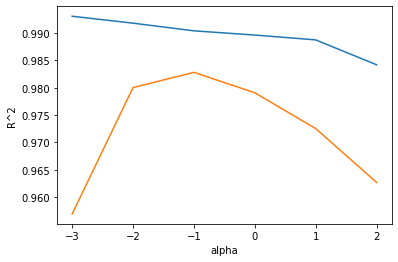

In [55]:
# 바로 그래프를 그리면 왼쪽이 촘촘해지므로 동일한 간격을 위해 로그함수로 바꿔서 지수로 표현
plt.plot(np.log10(alpha_list), train_score)#훈련
plt.plot(np.log10(alpha_list), test_score)#테스트
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [56]:
# alpha가 -1일 때 테스트 세트 점수가 가장 높은 -1, 10의 -1승=0.1
# alpha값 0.1로 하여 최종 모델 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9903815817570366

In [57]:
ridge.score(test_scaled, test_target)

0.9827976465386894

In [ ]:
# 과대적합과 과소적합 사이에서 균형 맞춤

## 라쏘 모델 : 계수의 절댓값 기준으로 규제 적용 ##

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)#과대적합 잘 억제

0.9897898972080961

In [61]:
lasso.score(test_scaled, test_target)#둘다 훈련이 잘 됨

0.9800593698421884

In [62]:
# 최적 alpha값 찾기
train_score = []
test_score = []

In [63]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]#alpha값 0.001에서 100까지 10배씩 늘려가기
for alpha in alpha_list:
#     라쏘 모델 만들기
    lasso = Lasso(alpha=alpha, max_iter=10000)#최적의 계수 찾기 위한 반복작업 수행 max_iter매개변수 늘리기
#     라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
#     훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.69795779601, tolerance: 518.2793833333334
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345409666, tolerance: 518.2793833333334
  positive)


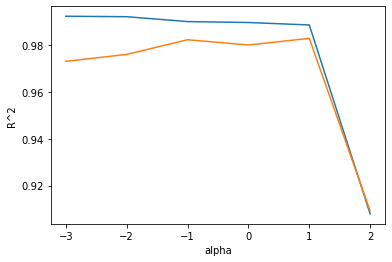

In [64]:
plt.plot(np.log10(alpha_list), train_score)#훈련
plt.plot(np.log10(alpha_list), test_score)#테스트
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 왼쪽은 과대적합, 오른쪽은 과소적합으로 점수가 크게 떨어짐 최적 알파값이 1, 10의 1승인 10임

In [65]:
# alpha 10으로 다시 훈련
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.9888067471131867

In [66]:
lasso.score(test_scaled, test_target)#둘다 훈련이 잘 됨

0.9824470598706695

In [67]:
# 라쏘 모델은 계수 값을 아예 0으로 만들 수 있음, 라쏘 모델의 계수는 coef_속성에 저장되어 있음
# 이 중에 0인 계수는 몇개?
np.sum(lasso.coef_ ==0)#배열을 모두 더한 값을 반환

40

In [ ]:
# 특성 55개중 15개만 사용, 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있음